In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
flights=pd.read_csv('ontime_per.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
for i in flights.columns:
    if flights[i].isnull().sum() > 300000:
        flights.drop(i, axis = 1, inplace = True)

In [4]:
for i in flights.columns:
    if flights[i].nunique() == 1:
        flights.drop(i, axis = 1, inplace = True)

In [5]:
flights.dropna(inplace = True)
flights.shape

(433298, 52)

In [6]:
flights = flights.drop(['FlightDate', 'TailNum', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'WheelsOff',
       'WheelsOn', 'ArrDelay', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'CRSElapsedTime', 'ActualElapsedTime',
       'DistanceGroup', 'DivAirportLandings'], axis = 1)

In [7]:
flights.columns

Index(['DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'AirlineID', 'Carrier',
       'FlightNum', 'OriginAirportID', 'Origin', 'Dest', 'CRSDepTime',
       'TaxiOut', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes',
       'ArrDel15', 'Cancelled', 'Diverted', 'AirTime', 'Distance'],
      dtype='object')

                 DayofMonth  DayOfWeek  AirlineID  FlightNum  OriginAirportID  \
DayofMonth         1.000000   0.030139  -0.002764  -0.039638         0.000470   
DayOfWeek          0.030139   1.000000   0.004879   0.043642         0.010927   
AirlineID         -0.002764   0.004879   1.000000   0.326941         0.000860   
FlightNum         -0.039638   0.043642   0.326941   1.000000        -0.012578   
OriginAirportID    0.000470   0.010927   0.000860  -0.012578         1.000000   
CRSDepTime        -0.008330   0.019423   0.004906  -0.011096        -0.034424   
TaxiOut           -0.010403  -0.007349   0.179297   0.118542        -0.033445   
TaxiIn            -0.035888   0.004184   0.065527  -0.035441         0.042621   
CRSArrTime         0.009274   0.009307  -0.016251  -0.017750        -0.000915   
ArrTime            0.012365   0.006871  -0.021931  -0.011565        -0.002146   
ArrDelayMinutes   -0.036819   0.015591   0.070629   0.030255         0.017996   
ArrDel15          -0.056635 

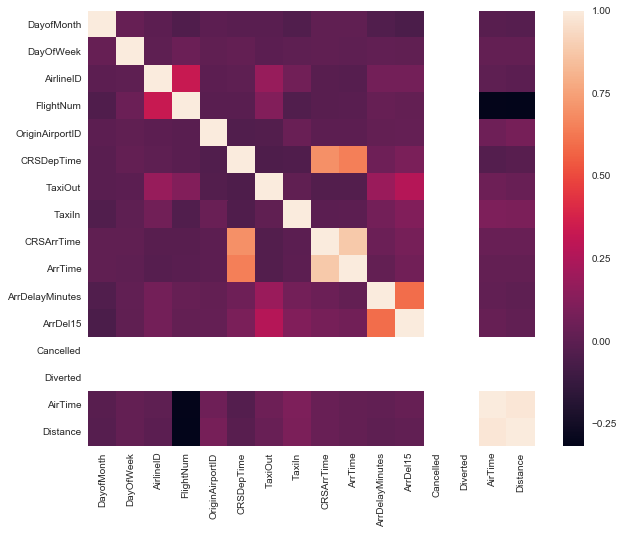

In [8]:
sns.set(style="white")
plt.figure(figsize = (10, 8))
corr = flights.corr()
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns)
print(corr)

In [9]:
flights.drop(["AirTime"], axis = 1, inplace = True)
flights.drop(["ArrDel15"], axis = 1, inplace = True)
flights.drop(["ArrTime"], axis = 1, inplace = True)


In [10]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433298 entries, 0 to 445826
Data columns (total 17 columns):
DayofMonth         433298 non-null int64
DayOfWeek          433298 non-null int64
UniqueCarrier      433298 non-null object
AirlineID          433298 non-null int64
Carrier            433298 non-null object
FlightNum          433298 non-null int64
OriginAirportID    433298 non-null int64
Origin             433298 non-null object
Dest               433298 non-null object
CRSDepTime         433298 non-null int64
TaxiOut            433298 non-null float64
TaxiIn             433298 non-null float64
CRSArrTime         433298 non-null int64
ArrDelayMinutes    433298 non-null float64
Cancelled          433298 non-null float64
Diverted           433298 non-null float64
Distance           433298 non-null float64
dtypes: float64(6), int64(7), object(4)
memory usage: 59.5+ MB


In [11]:
carrier_avg_delay = flights['ArrDelayMinutes'].groupby(flights['UniqueCarrier']).mean()
carrier_avg_taxiIn = flights['TaxiIn'].groupby(flights['UniqueCarrier']).mean()
carrier_avg_taxiOut = flights['TaxiOut'].groupby(flights['UniqueCarrier']).mean()
carrier_avg_dist = flights['Distance'].groupby(flights['UniqueCarrier']).mean()
#carrier_avg_time = flights['AirTime'].groupby(flights['UniqueCarrier']).mean()
carrier_diverted = flights['Diverted'].groupby(flights['UniqueCarrier']).sum()


In [12]:
summary_table_carrier = pd.concat([carrier_avg_delay,carrier_avg_taxiIn,carrier_avg_taxiOut,carrier_avg_dist,carrier_diverted], axis=1)

In [13]:
summary_table_carrier

,ArrDelayMinutes,TaxiIn,TaxiOut,Distance,Diverted
UniqueCarrier,,,,,
AA,10.695254,8.650682,17.976023,1000.461010,0.0
AS,6.978953,6.540454,15.592680,1228.483947,0.0
B6,17.283021,6.183062,17.058906,1069.467262,0.0
DL,9.460750,7.032382,18.502833,852.679500,0.0
EV,10.915249,7.359820,17.445659,441.357175,0.0
F9,10.652893,9.630949,16.140923,1038.543460,0.0
HA,4.184370,6.797608,11.037480,643.470813,0.0
NK,18.634635,9.465374,14.555690,999.963557,0.0
OO,15.167912,6.846493,20.408475,510.414311,0.0


In [14]:
summary_table_carrier.columns = ['Average Arrival Delay','Average Taxi-In','Average Taxi-Out','Average Flight Distance','Diverted Flights']
summary_table_carrier

,Average Arrival Delay,Average Taxi-In,Average Taxi-Out,Average Flight Distance,Diverted Flights
UniqueCarrier,,,,,
AA,10.695254,8.650682,17.976023,1000.461010,0.0
AS,6.978953,6.540454,15.592680,1228.483947,0.0
B6,17.283021,6.183062,17.058906,1069.467262,0.0
DL,9.460750,7.032382,18.502833,852.679500,0.0
EV,10.915249,7.359820,17.445659,441.357175,0.0
F9,10.652893,9.630949,16.140923,1038.543460,0.0
HA,4.184370,6.797608,11.037480,643.470813,0.0
NK,18.634635,9.465374,14.555690,999.963557,0.0
OO,15.167912,6.846493,20.408475,510.414311,0.0


In [15]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.cross_validation import train_test_split

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
df_train = flights[flights['DayofMonth']<23]
df_test  = flights[flights['DayofMonth']>=23]
df = df_train

In [18]:
features = ['DayofMonth','DayOfWeek','AirlineID','FlightNum','OriginAirportID','CRSDepTime','TaxiOut','TaxiIn','CRSArrTime','Cancelled','Diverted','Distance']
        
X_imp=df_train[features]
y_imp=df_train['ArrDelayMinutes']
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, train_size=0.70, random_state=0)
#print(X_imp)
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_imp.values, i) for i in range(X_imp.shape[1])]
vif["features"] = X_imp.columns
vif.round(1)


C:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1388: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
0,4.4,DayofMonth
1,5.2,DayOfWeek
2,96.5,AirlineID
3,2.8,FlightNum
4,69.0,OriginAirportID
5,16.4,CRSDepTime
6,4.3,TaxiOut
7,2.8,TaxiIn
8,18.6,CRSArrTime
9,NaN,Cancelled


In [19]:
def get_flight_delays(df,att, carrier, id_airport, extrem_values = False):
    df2 = df[(df['Carrier'] == carrier) & (df['Origin'] == id_airport)]
    if extrem_values:
        df2['ArrDelayMinutes'] = df2['ArrDelayMinutes'].apply(lambda x:x if x < 60 else np.nan)
        df2.dropna(how = 'any')
    test2 = df2['ArrDelayMinutes'].groupby(df2[att]).apply(get_stats).unstack()

    test2.reset_index(inplace=True)

    return test2

In [20]:
test2 = get_flight_delays(df,'TaxiIn', 'AA', 'JFK', False)
test2

,TaxiIn,count,max,mean,min
0,2.0,10.0,135.0,21.200000,0.0
1,3.0,60.0,346.0,18.316667,0.0
2,4.0,104.0,167.0,19.500000,0.0
3,5.0,150.0,900.0,21.440000,0.0
4,6.0,160.0,189.0,11.587500,0.0
5,7.0,112.0,257.0,11.696429,0.0
6,8.0,91.0,158.0,12.296703,0.0
7,9.0,67.0,215.0,20.477612,0.0
8,10.0,52.0,525.0,29.000000,0.0
9,11.0,41.0,122.0,12.756098,0.0


In [21]:
def linear_regression(test2,att):
    test = test2[['mean', att]].dropna(how='any', axis = 0)
    X = np.array(test[att])
    Y = np.array(test['mean'])
    X = X.reshape(len(X),1)
    Y = Y.reshape(len(Y),1)
    regr = linear_model.LinearRegression()
    model=regr.fit(X, Y)
    result = regr.predict(X)
    return X, Y, result


In [22]:
df2 = df[(df['Carrier'] == 'AA') & (df['Origin'] == 'JFK')]

test_taxi = get_flight_delays(df,'TaxiIn', 'AA', 'JFK', False)
X1, Y1, result2 = linear_regression(test_taxi,'TaxiIn')


test_taxi1 = get_flight_delays(df,'TaxiIn', 'AA', 'JFK', True)
X2, Y2, result3 = linear_regression(test_taxi1,'TaxiIn')


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


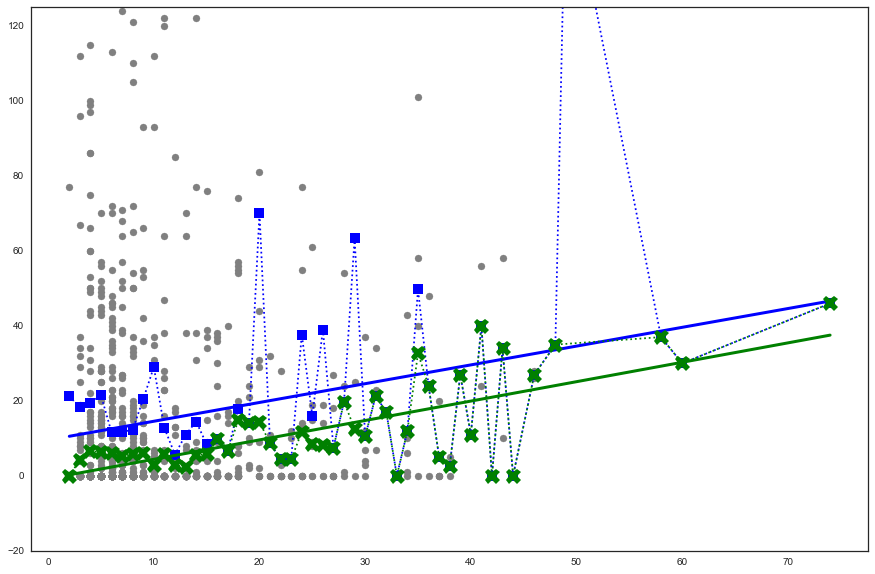

In [23]:
plt.figure(figsize=(15,10))
plt.ylim(-20,125)
plt.scatter(df2['TaxiIn'], df2['ArrDelayMinutes'], color='grey')
plt.plot(X1, Y1, 'bs', linestyle = ':', markersize = 10)
plt.plot(X1, result2, color = 'b', linestyle = '-', linewidth = 3)
plt.plot(X2, Y2, 'gX', linestyle = ':', markersize = 15)
plt.plot(X2, result3, color = 'g', linestyle = '-', linewidth = 3);

In [24]:
test_data =  get_flight_delays(df_test,'TaxiIn', 'AA', 'JFK', True)
test_data = test_data[['mean', 'TaxiIn']].dropna(how='any', axis = 0)
X_test = np.array(test_data['TaxiIn'])
Y_test = np.array(test_data['mean'])
X_test = X_test.reshape(len(X_test),1)
Y_test = Y_test.reshape(len(Y_test),1)
regr = linear_model.LinearRegression()
model=regr.fit(X2,Y2)
result = regr.predict(X_test)
print(regr.score(X2,Y2))
mae=mean_squared_error(Y_test, result)
print(mae)

0.498252102839
122.734016583


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [25]:
test_dist = get_flight_delays(df,'Distance', 'AA', 'JFK', False)
X1, Y1, result2 = linear_regression(test_dist,'Distance')


test_dist1 = get_flight_delays(df,'Distance', 'AA', 'JFK', True)
X2, Y2, result3 = linear_regression(test_dist1,'Distance')


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


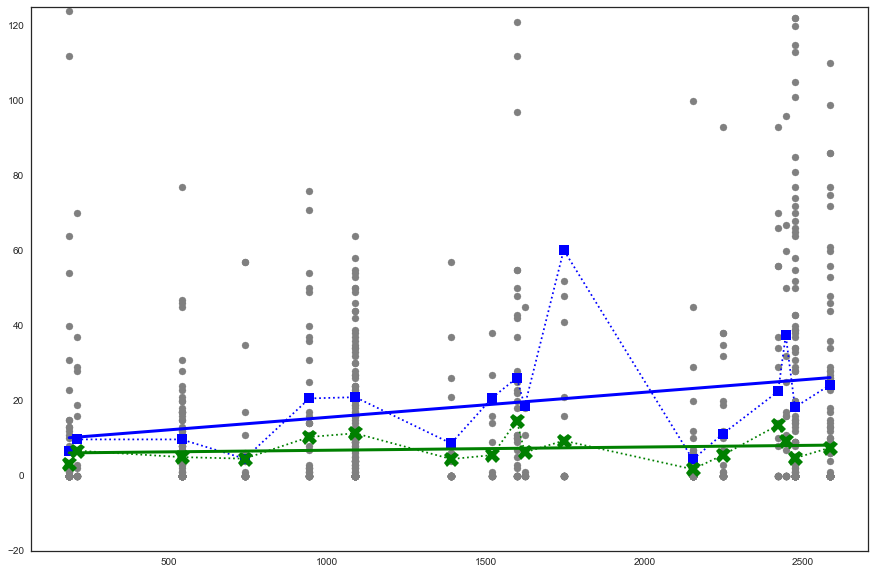

In [26]:
plt.figure(figsize=(15,10))
plt.ylim(-20,125)
plt.scatter(df2['Distance'], df2['ArrDelayMinutes'], color='grey')
plt.plot(X1, Y1, 'bs', linestyle = ':', markersize = 10)
plt.plot(X1, result2, color = 'b', linestyle = '-', linewidth = 3)
plt.plot(X2, Y2, 'gX', linestyle = ':', markersize = 15)
plt.plot(X2, result3, color = 'g', linestyle = '-', linewidth = 3);

In [27]:
test_data =  get_flight_delays(df_test,'Distance', 'AA', 'JFK', True)
test_data = test_data[['mean', 'Distance']].dropna(how='any', axis = 0)
X_test = np.array(test_data['Distance'])
Y_test = np.array(test_data['mean'])
X_test = X_test.reshape(len(X_test),1)
Y_test = Y_test.reshape(len(Y_test),1)
regr = linear_model.LinearRegression()
model=regr.fit(X2,Y2)
result = regr.predict(X_test)
print(regr.score(X2,Y2))
mae=mean_squared_error(Y_test, result)
print(mae)

0.0363563775702
31.1732217981


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [28]:
test_month = get_flight_delays(df,'DayofMonth', 'AA', 'JFK', False)
X1, Y1, result2 = linear_regression(test_month,'DayofMonth')


test_month1 = get_flight_delays(df,'DayofMonth', 'AA', 'JFK', True)
X2, Y2, result3 = linear_regression(test_month1,'DayofMonth')


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


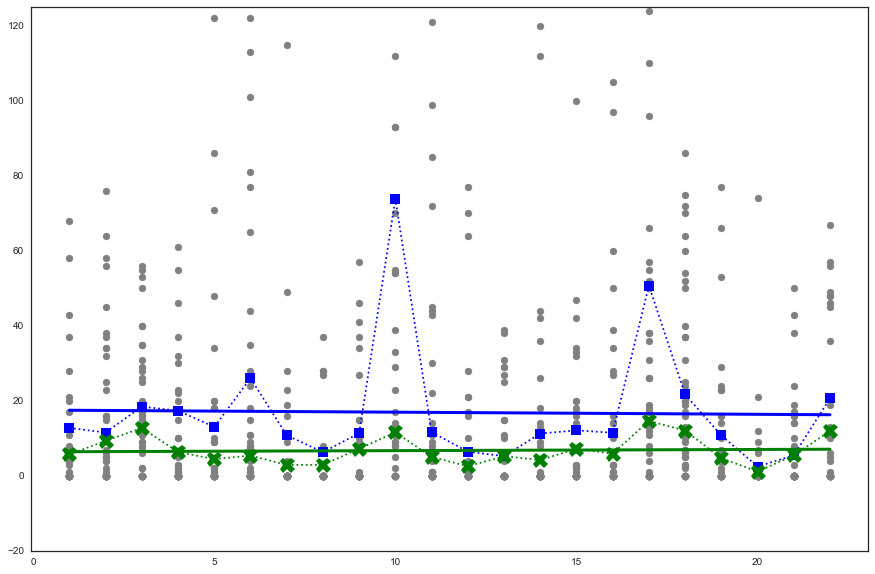

In [29]:
plt.figure(figsize=(15,10))
plt.ylim(-20,125)
plt.scatter(df2['DayofMonth'], df2['ArrDelayMinutes'], color='grey')
plt.plot(X1, Y1, 'bs', linestyle = ':', markersize = 10)
plt.plot(X1, result2, color = 'b', linestyle = '-', linewidth = 3)
plt.plot(X2, Y2, 'gX', linestyle = ':', markersize = 15)
plt.plot(X2, result3, color = 'g', linestyle = '-', linewidth = 3);

In [30]:
test_data =  get_flight_delays(df_test,'DayofMonth', 'AA', 'JFK', True)
test_data = test_data[['mean', 'DayofMonth']].dropna(how='any', axis = 0)
X_test = np.array(test_data['DayofMonth'])
Y_test = np.array(test_data['mean'])
X_test = X_test.reshape(len(X_test),1)
Y_test = Y_test.reshape(len(Y_test),1)
regr = linear_model.LinearRegression()
model=regr.fit(X2,Y2)
result = regr.predict(X_test)
print(regr.score(X2,Y2))
mae=mean_squared_error(Y_test, result)
print(mae)

0.00303801926318
14.8580583078


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [31]:
test_week = get_flight_delays(df,'DayOfWeek', 'AA', 'JFK', False)
X1, Y1, result2 = linear_regression(test_week,'DayOfWeek')


test_week1 = get_flight_delays(df,'DayOfWeek', 'AA', 'JFK', True)
X2, Y2, result3 = linear_regression(test_week1,'DayOfWeek')


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


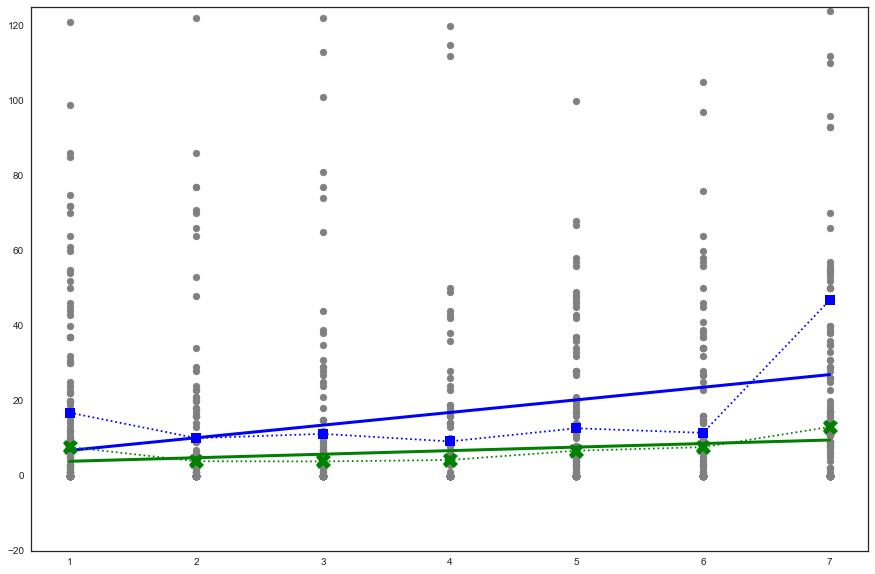

In [32]:
plt.figure(figsize=(15,10))
plt.ylim(-20,125)
plt.scatter(df2['DayOfWeek'], df2['ArrDelayMinutes'], color='grey')
plt.plot(X1, Y1, 'bs', linestyle = ':', markersize = 10)
plt.plot(X1, result2, color = 'b', linestyle = '-', linewidth = 3)
plt.plot(X2, Y2, 'gX', linestyle = ':', markersize = 15)
plt.plot(X2, result3, color = 'g', linestyle = '-', linewidth = 3);

In [33]:
test_data =  get_flight_delays(df_test,'DayOfWeek', 'AA', 'JFK', True)
test_data = test_data[['mean', 'DayOfWeek']].dropna(how='any', axis = 0)
X_test = np.array(test_data['DayOfWeek'])
Y_test = np.array(test_data['mean'])
X_test = X_test.reshape(len(X_test),1)
Y_test = Y_test.reshape(len(Y_test),1)
regr = linear_model.LinearRegression()
model=regr.fit(X2,Y2)
result = regr.predict(X_test)
print(regr.score(X2,Y2))
mae=mean_squared_error(Y_test, result)
print(mae)

0.389652105629
18.1645528822


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [34]:
test_num = get_flight_delays(df,'FlightNum', 'AA', 'JFK', False)
X1, Y1, result2 = linear_regression(test_num,'FlightNum')


test_num1 = get_flight_delays(df,'FlightNum', 'AA', 'JFK', True)
X2, Y2, result3 = linear_regression(test_num1,'FlightNum')


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


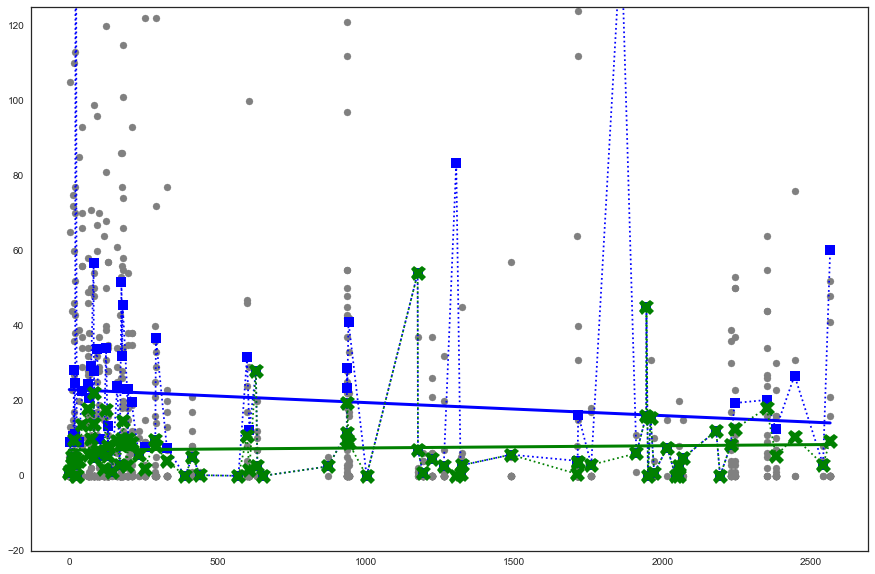

In [35]:
plt.figure(figsize=(15,10))
plt.ylim(-20,125)
plt.scatter(df2['FlightNum'], df2['ArrDelayMinutes'], color='grey')
plt.plot(X1, Y1, 'bs', linestyle = ':', markersize = 10)
plt.plot(X1, result2, color = 'b', linestyle = '-', linewidth = 3)
plt.plot(X2, Y2, 'gX', linestyle = ':', markersize = 15)
plt.plot(X2, result3, color = 'g', linestyle = '-', linewidth = 3);

In [36]:
test_data =  get_flight_delays(df_test,'FlightNum', 'AA', 'JFK', True)
test_data = test_data[['mean', 'FlightNum']].dropna(how='any', axis = 0)
X_test = np.array(test_data['FlightNum'])
Y_test = np.array(test_data['mean'])
X_test = X_test.reshape(len(X_test),1)
Y_test = Y_test.reshape(len(Y_test),1)
regr = linear_model.LinearRegression()
model=regr.fit(X2,Y2)
result = regr.predict(X_test)
print(regr.score(X2,Y2))
mae=mean_squared_error(Y_test, result)
print(mae)

0.00318375761479
39.6012302885


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
def get_merged_delays(df, carrier):
    list_airports = df[df['Carrier'] == carrier]['Origin'].unique()
    i = 0
    list_columns = ['Origin', 'TaxiIn', 'mean']
    for id_airport in list_airports:
        test2 = get_flight_delays(df,'TaxiIn', carrier, id_airport, True)
        test2.loc[:, 'Origin'] = id_airport
        test2 = test2[list_columns]
        test2.dropna(how = 'any', inplace = True)
        if i == 0:
            merged_df = test2.copy()
        else:
            merged_df = pd.concat([merged_df, test2], ignore_index = True)
        i += 1    
    return merged_df

In [38]:

merged_df = get_merged_delays(df,'AA')
merged_df.shape

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(2595, 3)

In [39]:
merged_df.head()

,Origin,TaxiIn,mean
0,DFW,1.0,0.923077
1,DFW,2.0,5.341014
2,DFW,3.0,3.849197
3,DFW,4.0,4.634656
4,DFW,5.0,5.488290


In [40]:
indicator_var1 = pd.DataFrame()
categories = ['Origin']

for i in categories:
    x = pd.get_dummies(merged_df[i],drop_first=True)
    indicator_var1 = pd.concat([indicator_var1, x],axis=1)
    
merged_df.drop(['Origin'], axis = 1, inplace = True)

merged_df = pd.concat([indicator_var1, merged_df],axis=1)


In [41]:
merged_df.shape

(2595, 96)

In [42]:
features = []
for i in merged_df.columns:
    if i != "mean":
        features.append(i)
X=merged_df[features]
y=merged_df['mean']        

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
mse=mean_squared_error(predictions, y_test)
print(lm.score(X_train,y_train))
print(mse)

0.454200772676
66.1851364955


In [44]:
poly = PolynomialFeatures(degree = 2)
regr = linear_model.LinearRegression()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
regr.fit(X_train_poly, y_train)
predictions = regr.predict(X_test_poly)
mse=mean_squared_error(predictions, y_test)
print(regr.score(X_train_poly,y_train))
print(mse)

0.563569706829
65.0514604723


In [45]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.3,normalize=True)
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

ridgereg.fit(X_train_poly, y_train)

predictions = ridgereg.predict(X_test_poly)
mse=mean_squared_error(predictions, y_test)
print(ridgereg.score(X_train_poly,y_train))
print(mse)

0.529824210617
60.0209454395


In [46]:
#verbose_level=10
from sklearn.model_selection import GridSearchCV
model=Ridge()
parameters={"alpha": [ 10,1,0.1,0.3],'normalize':[True,False]}
grid = GridSearchCV(model, cv=10,param_grid=parameters)

grid.fit(X_train_poly, y_train)
predictions = grid.predict(X_test_poly)
mse=mean_squared_error(predictions, y_test)
print(mse)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)



60.858607275
0.454059033348
{'alpha': 10, 'normalize': False}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [47]:
merged_df_test = get_merged_delays(df_test, 'AA')
merged_df_test.shape

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(1809, 3)

In [48]:
indicator_var1 = pd.DataFrame()
categories = ['Origin']

for i in categories:
    x = pd.get_dummies(merged_df_test[i],drop_first=True)
    indicator_var1 = pd.concat([indicator_var1, x],axis=1)
    
merged_df_test.drop(['Origin'], axis = 1, inplace = True)

merged_df_test = pd.concat([indicator_var1, merged_df_test],axis=1)
merged_df_test.shape

(1809, 94)

In [49]:
features = []
for i in merged_df_test.columns:
    if i != "mean":
        features.append(i)
X=merged_df_test[features]
y=merged_df_test['mean']      
X_test_poly1 = poly.fit_transform(X)


In [50]:
predictions = grid.predict(X_test_poly)
mse=mean_squared_error(predictions, y)
print(mse)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

ValueError: Found input variables with inconsistent numbers of samples: [779, 1809]

In [51]:
def create_df(df, carrier):
    df2 = df[df['Carrier'] == carrier][['ArrDelayMinutes','TaxiIn','Distance','DayofMonth','DayOfWeek','FlightNum']]
    df2.dropna(how = 'any', inplace = True)
    df2['ArrDelayMinutes'] = df2['ArrDelayMinutes'].apply(lambda x:x if x < 60 else np.nan)
    df2.dropna(how = 'any', inplace = True)
    df3 = df2.groupby(['TaxiIn','Distance'],as_index = False).mean()
    return df3

In [52]:
df3 = create_df(df, 'AA')    
df3.head()

,TaxiIn,Distance,ArrDelayMinutes,DayofMonth,DayOfWeek,FlightNum
0,1.0,168.0,0.0,19.0,2.0,1795.0
1,1.0,190.0,0.0,17.0,7.0,1561.0
2,1.0,214.0,4.0,18.0,4.5,2145.5
3,1.0,247.0,6.0,3.5,4.0,1393.0
4,1.0,257.0,0.0,4.0,1.0,2028.0


In [53]:
#indicator_var1 = pd.DataFrame()
#categories = ['Origin']

#for i in categories:
 #   x = pd.get_dummies(df3[i],drop_first=True)
  #  indicator_var1 = pd.concat([indicator_var1, x],axis=1)
    
#df3.drop(['Origin'], axis = 1, inplace = True)

#df3 = pd.concat([indicator_var1, df3],axis=1)
#df3.shape

In [54]:
features = []
for i in df3.columns:
    if i != "ArrDelayMinutes":
        features.append(i)
X=df3[features]
y=df3['ArrDelayMinutes']        

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)

from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.3,normalize=True)
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

ridgereg.fit(X_train_poly, y_train)

predictions = ridgereg.predict(X_test_poly)
mse=mean_squared_error(predictions, y_test)
print(ridgereg.score(X_train_poly,y_train))
print(mse)

0.252899246111
69.895110335


In [60]:
#x=[1.0,168.0,19.0,2.0,1795.0]
#x.reshape(-1, 1)
predictions = ridgereg.predict(X_test_poly[0:1])
print(predictions)

[ 4.00750134]
